<a href="https://colab.research.google.com/github/sandy9830/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np #For numerical operation, Linear Algebra
import pandas as pd # For dataset operations and analysis
#Visualization tools
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
#  With this backend, the output of plotting commands is displayed inline within frontends
#  directly below the code cell that produced it. 
#  The resulting plots will then also be stored in the notebook document.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Reading the dataset CSV file
hotel_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter_datasets/Hotel Bookings.csv')

df = hotel_df
#Printing the first 5 rows
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
import sweetviz
df_analysis = sweetviz.analyze(df)
#display the report

df_analysis.show_html('hotel_df_analysis.html')


                                             |          | [  0%]   00:00 -> (? left)

Report hotel_df_analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#**Dataset** **Analysis**

**1) hotel**

Categories
1.   City Hotel
2.   Resort Hotel


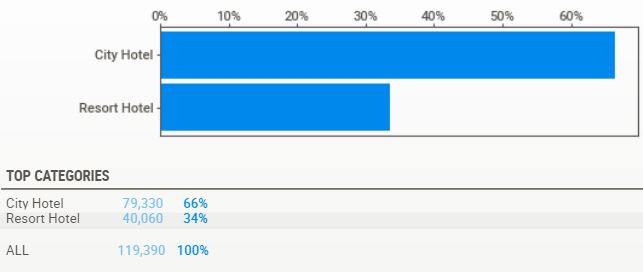

**Observation**

City Hotel has more number of bookings, it has 66%  bookings while resort hotel has 34%.






**2) is_canceled**

Value indicates wheather booking was cancelled or not.

**Distinct** **values**



1.   0 -> Not Cancelled
2.   1 -> Cancelled


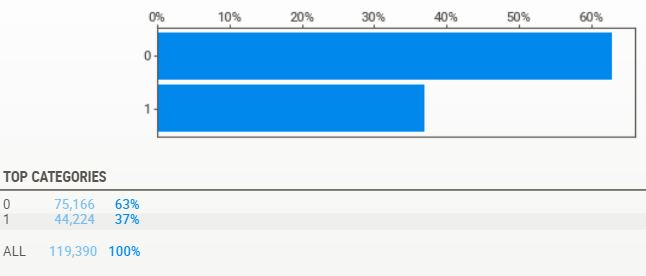


**Observation**

37% of the bookings were cancelled.



**3) lead_time**

Number of days elasped between booking date to the arrival date

**4) arrival_date_year**

Year of arrival 


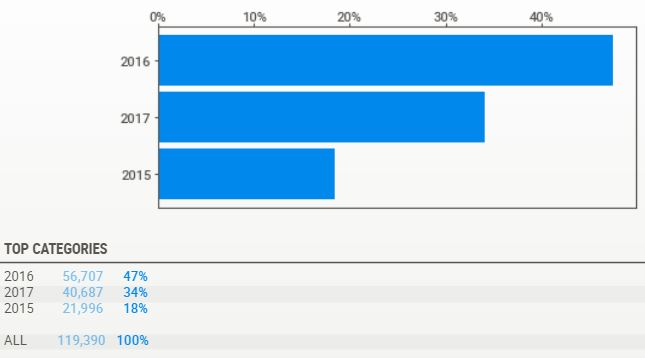


**observation**


There is 29% growth in the bookings in 2016(47%) that is more than a double comapared to previous year(2015 -> 18%) but the bookings decreased by 13% next year(2017 -> 34%).


**5**)**arrival_date_month**

Month of arrival

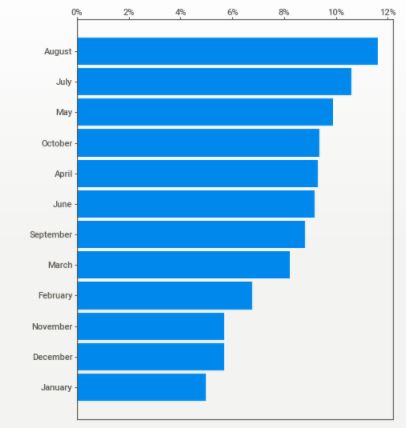

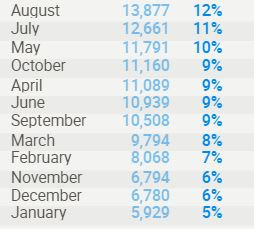


**observation**

Most bookings were made in August and July and least bookings were made at start and end of the year.


**6**)**arrival_date_week_number**

Week Number of the year for arrival date

**7**)**arrival_date_day_of_month**

Day of arrival


**8)** **stays_in_weekend_nights**

Number of weekend nights (Sat/Sun) booked to stay at the hotel.


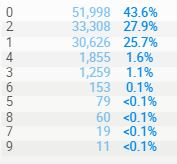


**Observation**
Customers usually booked for 1 or 2 weekend nights if stayed at the hotel in the weekends




**9) stays_in_week_nights**

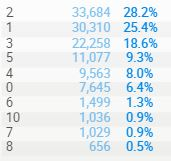

**Observation**

Customers usually booked for 1,2 or 3 week nights.

**10) adults**

Number of adults

**11) children**

Number of children

**12) babies**

Number of babies

**13) meal**

Type of meal booked


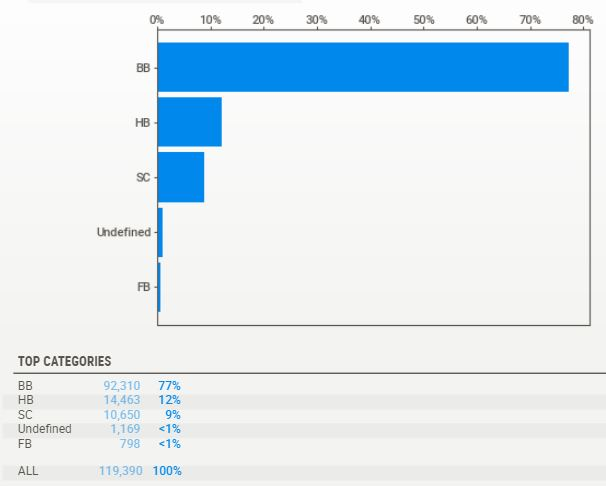

1.  BB – Bed & Breakfast


2.   HB – Half board (breakfast and one other meal – usually dinner)

3.  FB – Full board (breakfast, lunch and dinner)
 
4.  SC – no meal package
 

**Observation**


BB is the most common meal package.

**14) country**

country of origin.


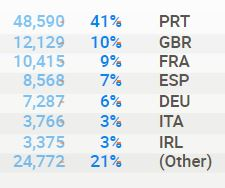

**Observation**


Most guests comes from Europe. Portugal, UK, France, Spain and Germany are the top countries from most guests come, more than 70% come from these 5 countries. 



**15) market_segment**

Group of people who share one or more common characteristics, lumped together for marketing purposes.

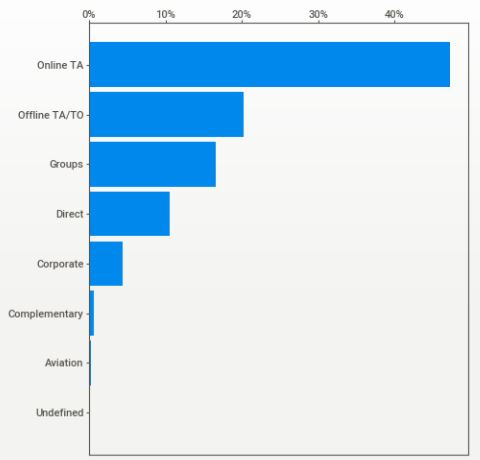


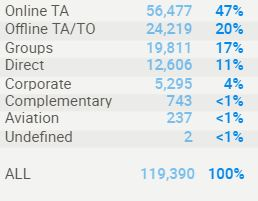


**Observation**


Most of the bookings were made online.



**16) distribution_channel**

A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer

**17)is_repeated_guest**

Value indicates if the booking name was from repeated guest



1.   0 -> Not a Repeated guest
2.   1 -> Repeated Guest

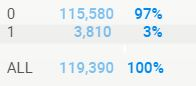



**observation**

Repeated Guest rate is 3%

**18) previous_cancelations**

Number of previous bookings that were cancelled by the customer prior to the current booking

**19) previous_booking_not_cancelled**


 Number of previous booking not canceled prior to current booking

 **20) reserved_room_type**

 Code of room type reserved.


 **21) assigned_room_type**

 Code of assigned room type.

 **22) booking_changes**

 Number of booking changes made

 **23)deposit_type**

 Type of deposit made by the customer for the reservation.

 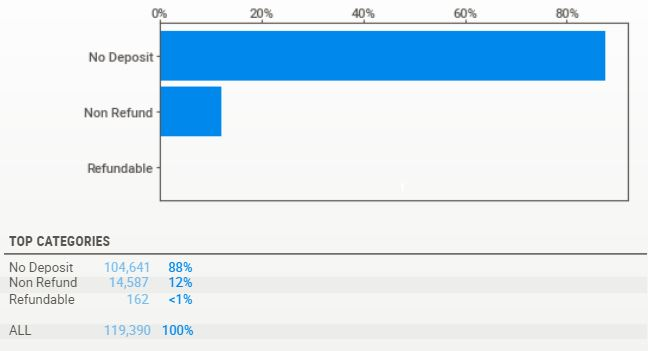

 **Observation**

 Most of the hotels are keeping deposit mandatory.

**24) agent**

ID of the travel agency that made the booking.

**25) company**

ID of the company that made the booking or is responsible for payment.

**26) days_in_waiting_list**

Number of days the booking was in the waiting list before it was confirmed.

**27) customer_type**

Type of booking.


1.   Contract -> when the booking has an allotment or other type of contract associated to it


2.   Group –> when the booking is associated to a group

3.   Transient –> when the booking is not part of a group or contract, and is not associated to other transient booking

4.   Transient-party –> when the booking is transient, but is associated to  other transient booking

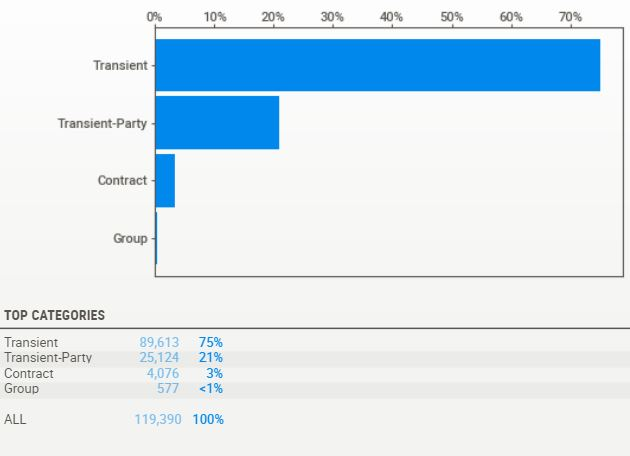

**Observation**

Most of the bookings were of transient type.






**28) adr**

Average Daily Rate (the sum of transactions divided by the Total number of nights stayed)

**29) required_car_parking_spaces**

Number of car parking spaces required by the customer.

**30) total_of_special_requests**

Number of special requests made by the customer.

**31) reservation_status**

Last reservation status 

1.   Canceled –> booking was canceled by the customer
2.   Check-Out –> customer has checked in and already departed
3.   No-Show –> customer did not check-in and did inform the hotel of the reason why

**22) reservation_status_date**

Date at which the last status was set. 








**Summary:**

1)City Hotel has more number of bookings, it has 66%  bookings while resort hotel has 34%.

2) 37% of the bookings were cancelled.

3)There is 29% growth in the bookings in 2016(47%) that is more than a double comapared to previous year(2015 -> 18%) but the bookings decreased by 13% next year(2017 -> 34%).

4)Most bookings were made in August and July and least bookings were made at start and end of the year.

5)Customers usually booked for 1 or 2 weekend nights if stayed at the hotel in the weekends.

6) Customers usually booked for 1,2 or 3 week nights.

7)BB is the most common meal package.

8)Most guests comes from Europe. Portugal, UK, France, Spain and Germany are the top countries from most guests come, more than 70% come from these 5 countries. 

9) Most of the bookings were made online.

10) Repeated Guest rate if 3%.

11)Most of the hotels are not keeping deposit mandatory.

12)Most of the bookings were of transient type.

**Note:**

All the visualization are taken from the sweetviz analysis 



#**Data** **Cleaning**

In [ ]:
#Checking for null values
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

Company , agent, country, children columns has null values. 

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [ ]:
#Replacing missing values
df[['company','agent','children']] = df[['company','agent','children']].fillna(0)
df['country'].fillna('Unknown', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:

#Converting some features from float to integers

df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [ ]:
# fill_mode = lambda col: col.fillna(col.mode())
# df.apply(fill_mode, axis=0)

#Filling the missing values with mode
# df['country'].fillna(df['country'].mode()[0],inplace=True)
# df['children'].fillna(df['children'].mode()[0],inplace=True)


In [ ]:
#Now we remove all those entries where there are no guests

no_guests = list(df[(df.adults + df.babies + df.children)==0].index)

df.drop(df.index[no_guests], inplace = True)

df.shape

(119210, 32)

In [ ]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
#Filling the undefined categories with mode
df.loc[df['meal']=='Undefined', 'meal'] = df.meal.mode()[0]

df.loc[df['market_segment']=='Undefined', 'market_segment'] = df.market_segment.mode()[0]
df.loc[df['distribution_channel']=='Undefined', 'distribution_channel'] = df.distribution_channel.mode()[0]


In [ ]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'GDS'], dtype=object)

In [ ]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

reservation_status_date           0
reservation_status                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type               

In [ ]:
#Univariant analysis
#Descriptional statistics
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#**Feature** **Engineering**

Added features



1.   **lead_time_bin**

  Adding a column of lead_time_bin which determines the time period to arrive at the hotel


In [ ]:
#Adding a column of lead_time_bin which determines the time period to arrive at the hotel
bins = np.arange(0,737,30)
hotel_df['lead_time_bin'] = np.searchsorted(bins, hotel_df['lead_time'].values)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,12
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,25
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1


In [ ]:
#df['total_no_of_guests'] = df['adults']+df['children']+df['babies']

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'lead_time_bin'],
      dtype='object')

In [ ]:
#df['reserved_equals_assigned'] = df['reserved_room_type'] == df['assigned_room_type']

In [ ]:
def get_percentage(vc,output=True):
  out=[]
  if output:
    print(vc)
  for category_val in vc:
    out.append(category_val/vc.sum()*100)
  return out


In [ ]:
df_city_hotel = df[df['hotel']=='City Hotel']
df_resort_hotel = df[df['hotel']=='Resort Hotel']
df_canceled = df[df['is_canceled']== 1]
df_not_canceled = df[df['is_canceled']==0]


In [ ]:
plt.rcParams["figure.figsize"] = (10,5)

#**1) Which type of Hotel is more likely to cancel?**


 CITY HOTEL CANCELLATION PERCENTAGE


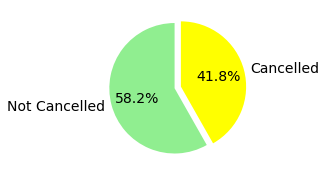

In [ ]:
# Convert value counts to list
sizes = df_city_hotel.groupby('hotel')['is_canceled'].value_counts().tolist()
plt.rcParams["figure.figsize"] = (3,3)

explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightgreen','yellow']

plt.pie(sizes, explode=explode, labels=['Not Cancelled','Cancelled'], colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
print('\n City Hotel Cancellation Percentage'.upper())


 RESORT HOTEL CANCELLATION PERCENTAGE


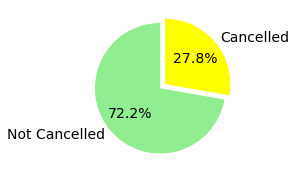

In [ ]:
# Convert value counts to list
sizes = df_resort_hotel.groupby('hotel')['is_canceled'].value_counts().tolist()

explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightgreen','yellow']

plt.pie(sizes, explode=explode, labels=['Not Cancelled','Cancelled'], colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
print('\n Resort Hotel Cancellation Percentage'.upper())

City Hotels has the cancelation percentage of 41.7% and resort hotels has 28% i.e city hotels are more likely to get cancelled and resort hotels are less likely to get cancelled, while the overall cancelation percentage is 37%.

#**2) How far in advance customers book hotels?**

In [ ]:
for cat in df.customer_type.unique():
  print('\n',cat.upper,'\n')
  print(get_percentage(df_not_canceled.loc[df_not_canceled['customer_type']==cat].groupby('customer_type')['lead_time_bin'].value_counts().head(5)))



 <built-in method upper of str object at 0x7fb35c6ce3b0> 

customer_type  lead_time_bin
Transient      1                20233
               2                 7834
               3                 5416
               0                 5233
               4                 3880
Name: lead_time_bin, dtype: int64
[47.49976523617241, 18.39139825335712, 12.714808902244343, 12.285191097755657, 9.108836510470466]

 <built-in method upper of str object at 0x7fb35c6ce3f0> 

customer_type  lead_time_bin
Contract       1                806
               2                347
               4                232
               6                231
               3                227
Name: lead_time_bin, dtype: int64
[43.73304395008139, 18.827997829625613, 12.588171459576778, 12.533912099837222, 12.316874660879002]

 <built-in method upper of str object at 0x7fb35c6ce430> 

customer_type    lead_time_bin
Transient-Party  1                4272
                 2                2526
                 

In [ ]:
(df.groupby('lead_time_bin')['is_canceled'].value_counts(normalize=True)*100)

lead_time_bin  is_canceled
0              0               93.342912
               1                6.657088
1              0               79.109419
               1               20.890581
2              0               63.579519
               1               36.420481
3              0               60.507275
               1               39.492725
4              0               55.460734
               1               44.539266
5              0               56.077178
               1               43.922822
6              0               54.163484
               1               45.836516
7              0               54.709313
               1               45.290687
8              0               52.796472
               1               47.203528
9              1               54.540112
               0               45.459888
10             1               64.496350
               0               35.503650
11             1               69.655172
               0              

Text(0.5, 0, 'Lead Time')

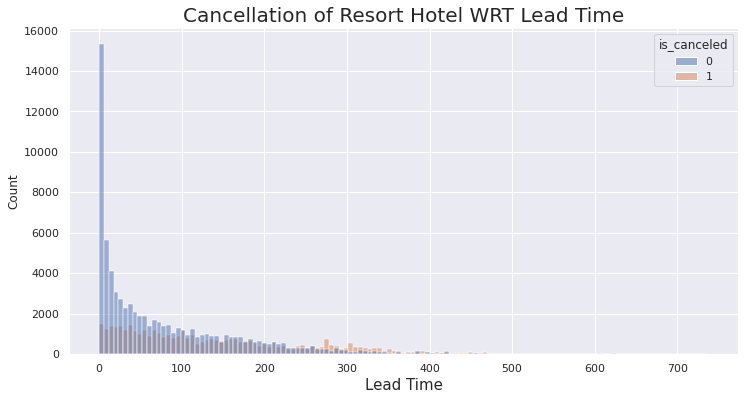

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='lead_time',data=df,hue='is_canceled')
plt.title("Cancellation of Resort Hotel WRT Lead Time",fontsize=20)
plt.xlabel("Lead Time",fontsize=15)

In [ ]:
for cat in df.market_segment.unique():
  try:
    print('\n',cat.upper,'\n')
    print(get_percentage(df_not_canceled.loc[df_not_canceled['market_segment']==cat].groupby('market_segment')['lead_time_bin'].value_counts().head(5)))
  except:
    continue



 <built-in method upper of str object at 0x7fd87c809830> 

market_segment  lead_time_bin
Direct          1                4101
                0                2575
                2                1080
                3                 798
                4                 527
Name: lead_time_bin, dtype: int64
[45.1602246448629, 28.355907939654223, 11.892963330029731, 8.787578460521969, 5.803325624931175]

 <built-in method upper of str object at 0x7fd87c809870> 

market_segment  lead_time_bin
Corporate       1                2955
                0                 666
                2                 337
                3                 196
                4                  86
Name: lead_time_bin, dtype: int64
[69.69339622641509, 15.70754716981132, 7.94811320754717, 4.622641509433962, 2.0283018867924527]

 <built-in method upper of str object at 0x7fd87c8098b0> 

market_segment  lead_time_bin
Online TA       1                12991
                2                 5774
           

**Lead Time over the Year**

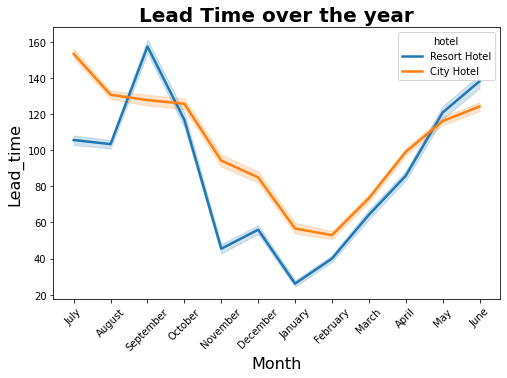

In [ ]:

plt.figure(figsize=(8, 5))

sns.lineplot(x = "arrival_date_month", y="lead_time", hue="hotel", data=df, size="hotel", sizes=(2.5, 2.5))
plt.title("Lead Time over the year", fontsize=20, fontweight = 'bold')
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Lead_time", fontsize=16)
plt.show()

In [ ]:
# upper_lim = df['lead_time'].quantile(.95)
# lower_lim = df['lead_time'].quantile(.05)
# print(upper_lim,lower_lim)
# #data = data[(data['column'] < upper_lim) & (data['column'] >
# lower_lim

In [ ]:
#sns.boxplot(df['lead_time'])

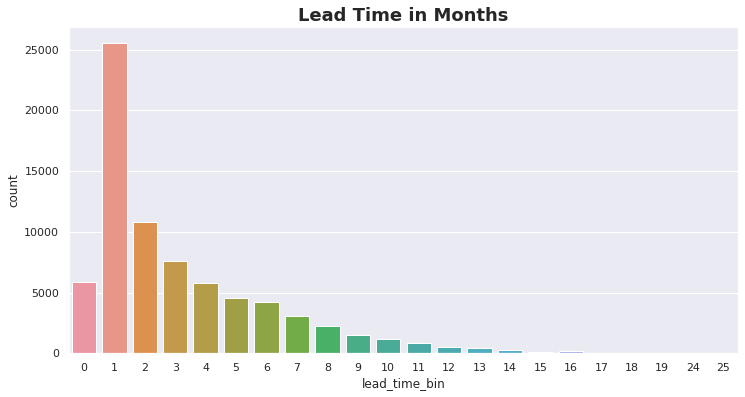

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
sns.set_theme(style="darkgrid")
plt.title('Lead Time in Months', fontsize = 18, fontweight='bold')
sns.countplot(data=df_not_canceled,x='lead_time_bin')

**Most of the customers book hotels 1 or 2 months prior to the arrival.**

#**3) Most popular meal package across hotels?**

In [ ]:
get_percentage(df_city_hotel.groupby('hotel')['meal'].value_counts())

hotel       meal
City Hotel  BB      62233
            SC      10474
            HB       6412
            FB         44
Name: meal, dtype: int64


[78.61374632088223, 13.230928590376816, 8.099743567070474, 0.05558152167047737]

In [ ]:
get_percentage(df_resort_hotel.groupby('hotel')['meal'].value_counts())

hotel         meal     
Resort Hotel  BB           30003
              HB            8046
              Undefined     1169
              FB             754
              SC              75
Name: meal, dtype: int64


[74.91946962319275,
 20.091392613678927,
 2.9190700926411464,
 1.8827877244238023,
 0.18727994606337553]

In [ ]:
plt.rcParams["figure.figsize"] = (5,3)

Text(0.5, 1.0, 'City Hotel Popular Meals')

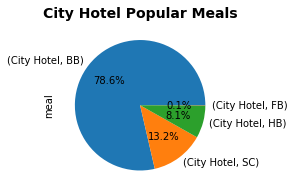

In [ ]:
df_city_hotel.groupby('hotel')['meal'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('City Hotel Popular Meals',fontsize=14,fontweight = 'bold')

Text(0.5, 1.0, 'Resort Hotel Popular Meals')

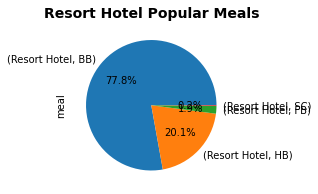

In [ ]:
df_resort_hotel.groupby('hotel')['meal'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Resort Hotel Popular Meals',fontsize=14,fontweight = 'bold')

**BB is the most popular meal in city hotels while BB and HB are popular in resort hotels.**

#**4) Which type of market_segment bookings are most likely to get cancelled?**

In [ ]:
for cat in df.market_segment.unique():
    try:
        
        print('\n',cat.upper(),'\n')
        print(get_percentage(df.loc[df.market_segment==cat].groupby('market_segment')['is_canceled'].value_counts()))
    except:
        continue


 DIRECT 

market_segment  is_canceled
Direct          0              10648
                1               1934
Name: is_canceled, dtype: int64
[84.62883484342711, 15.371165156572882]

 CORPORATE 

market_segment  is_canceled
Corporate       0              4291
                1               991
Name: is_canceled, dtype: int64
[81.23816736084817, 18.761832639151837]

 ONLINE TA 

market_segment  is_canceled
Online TA       0              35673
                1              20737
Name: is_canceled, dtype: int64
[63.238787449033865, 36.761212550966135]

 OFFLINE TA/TO 

market_segment  is_canceled
Offline TA/TO   0              15880
                1               8302
Name: is_canceled, dtype: int64
[65.66867918286329, 34.331320817136714]

 COMPLEMENTARY 

market_segment  is_canceled
Complementary   0              639
                1               89
Name: is_canceled, dtype: int64
[87.77472527472527, 12.225274725274724]

 GROUPS 

market_segment  is_canceled
Groups          1    

In [ ]:
for cat in df.market_segment.unique():
    try:
        
        print('\n',cat.upper(),'\n')
        print(df.loc[df.market_segment==cat].groupby('market_segment')['is_canceled'].value_counts(normalize=True)*100)
    except:
        continue


 DIRECT 

market_segment  is_canceled
Direct          0              84.628835
                1              15.371165
Name: is_canceled, dtype: float64

 CORPORATE 

market_segment  is_canceled
Corporate       0              81.238167
                1              18.761833
Name: is_canceled, dtype: float64

 ONLINE TA 

market_segment  is_canceled
Online TA       0              63.238787
                1              36.761213
Name: is_canceled, dtype: float64

 OFFLINE TA/TO 

market_segment  is_canceled
Offline TA/TO   0              65.668679
                1              34.331321
Name: is_canceled, dtype: float64

 COMPLEMENTARY 

market_segment  is_canceled
Complementary   0              87.774725
                1              12.225275
Name: is_canceled, dtype: float64

 GROUPS 

market_segment  is_canceled
Groups          1              61.108585
                0              38.891415
Name: is_canceled, dtype: float64

 AVIATION 

market_segment  is_canceled
Aviation 

In [ ]:
ms_ic = pd.DataFrame()
for cat in df.market_segment.unique():
    print((df.loc[df.market_segment==cat].groupby('market_segment')['is_canceled'].value_counts(normalize=True)*100).to_frame())
    

                            is_canceled
market_segment is_canceled             
Direct         0              84.628835
               1              15.371165
                            is_canceled
market_segment is_canceled             
Corporate      0              81.238167
               1              18.761833
                            is_canceled
market_segment is_canceled             
Online TA      0              63.238787
               1              36.761213
                            is_canceled
market_segment is_canceled             
Offline TA/TO  0              65.668679
               1              34.331321
                            is_canceled
market_segment is_canceled             
Complementary  0              87.774725
               1              12.225275
                            is_canceled
market_segment is_canceled             
Groups         1              61.108585
               0              38.891415
                            is_canceled


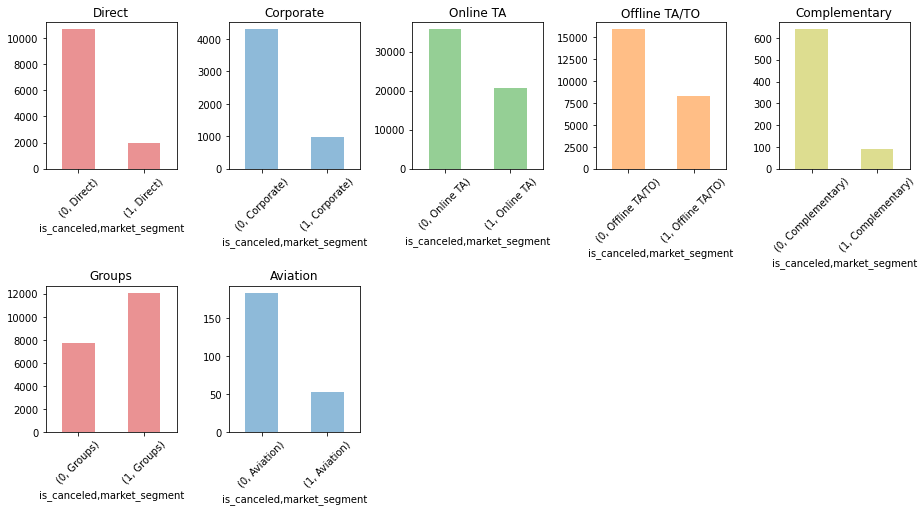

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.market_segment.unique()):
  plt.subplot(4,5,i+1)
  plt.title(cat)
  df.loc[df.market_segment==cat].groupby('is_canceled')['market_segment'].value_counts().plot(kind='bar',color=colors[i%5],alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

Text(0.5, 0, 'Market Segment')

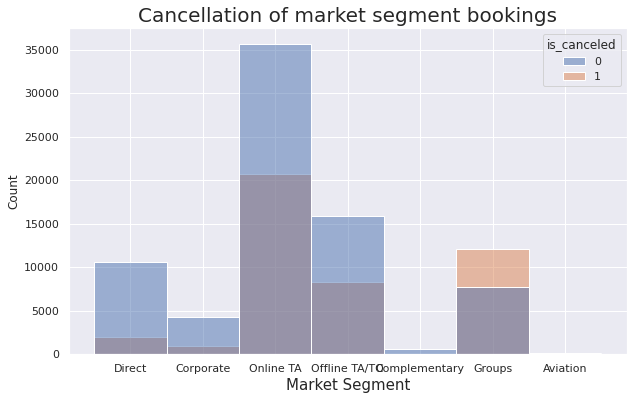

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='market_segment',data=df,hue='is_canceled')
plt.title("Cancellation of market segment bookings",fontsize=20)
plt.xlabel("Market Segment",fontsize=15)

**Bookings through groups(61%) and online TA(36.7%) market_segment are more likely to get cancelled.**

#**5) Bookings from market_segment across years**

In [ ]:

df.loc[df['market_segment']=='Undefined', 'market_segment'] = df.market_segment.mode()[0]

In [ ]:
texts = sorted(df.market_segment.unique(),reverse=True)
texts = texts[:-1]
texts
labels = ['0']
labels.extend(texts)
labels

['0',
 'Online TA',
 'Offline TA/TO',
 'Groups',
 'Direct',
 'Corporate',
 'Complementary']

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

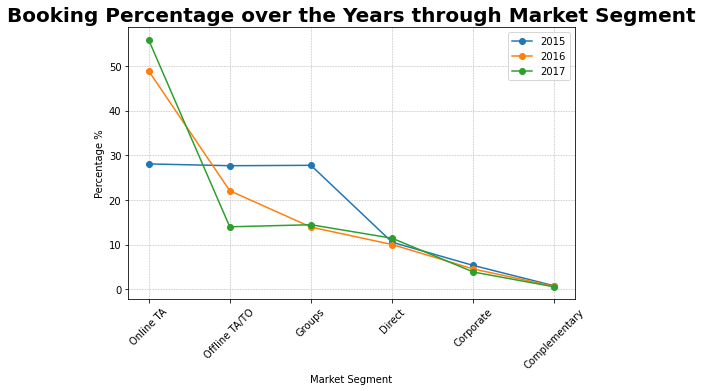

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)

fig,ax = plt.subplots()
for year in df.arrival_date_year.unique():
    ax.plot(get_percentage(df.loc[df.arrival_date_year==year].groupby('arrival_date_year')['market_segment'].value_counts().sort_index(ascending=False).head(6),False),label=year,marker='o')
    leg = ax.legend()
    ax.set_xticklabels(labels)
plt.xlabel('Market Segment')
plt.ylabel('Percentage %')
plt.title('Booking Percentage over the Years through Market Segment',fontsize=20, fontweight = 'bold')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=45)

    

**Online Bookings are increasing over the years (28.03% in 2015 to 48.79% in 2016 to 55.68% in 2017).**

#**6) Bookings from which distribution channel are more sucessful and which has more cancellation percentage?**

In [ ]:
for cat in df.distribution_channel.unique():
  print('\n',cat,'\n')
  print(get_percentage(df.loc[df.distribution_channel==cat].groupby('distribution_channel')['is_canceled'].value_counts()))


 Direct 

distribution_channel  is_canceled
Direct                0              12056
                      1               2555
Name: is_canceled, dtype: int64
[82.51317500513312, 17.486824994866883]

 Corporate 

distribution_channel  is_canceled
Corporate             0              5184
                      1              1467
Name: is_canceled, dtype: int64
[77.94316644113667, 22.056833558863328]

 TA/TO 

distribution_channel  is_canceled
TA/TO                 0              57615
                      1              40140
Name: is_canceled, dtype: int64
[58.93816173085775, 41.06183826914224]

 GDS 

distribution_channel  is_canceled
GDS                   0              156
                      1               37
Name: is_canceled, dtype: int64
[80.82901554404145, 19.170984455958546]


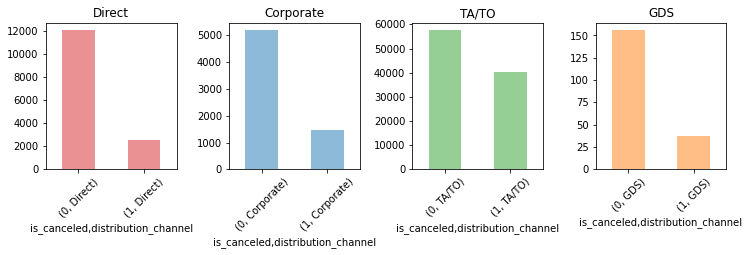

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.distribution_channel.unique()):
  plt.subplot(4,5,i+1)
  plt.title(cat)
  df.loc[df.distribution_channel==cat].groupby('is_canceled')['distribution_channel'].value_counts().plot(kind='bar',color=colors[i%5],alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

Text(0.5, 0, 'Distribution Channel')

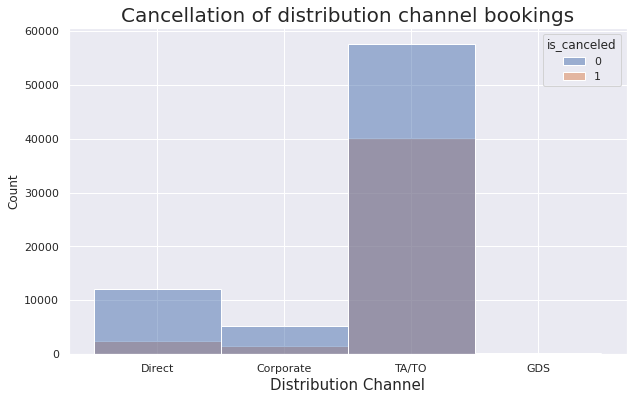

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='distribution_channel',data=df,hue='is_canceled')
plt.title("Cancellation of distribution channel bookings",fontsize=20)
plt.xlabel("Distribution Channel",fontsize=15)

**Bookings from direct distribution channel are highly sucessfull and TA/TO has highest cancellation percentage.**

#**7) How likely repeated guest is going to cancel booking?**

In [ ]:
get_percentage(df.loc[df['is_repeated_guest']== 1].groupby('is_repeated_guest')['is_canceled'].value_counts())

is_repeated_guest  is_canceled
1                  0              3205
                   1               550
Name: is_canceled, dtype: int64


[85.35286284953395, 14.647137150466044]

In [ ]:
# plot_kwargs={‘xticks’:range(1,13),
#  ‘yticks’:(0,10,20,30),
#  ‘grid’:True,
#  ‘fontsize’:12}

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

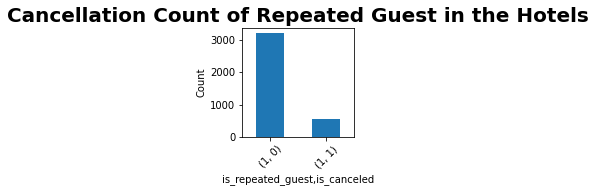

In [ ]:
plt.rcParams["figure.figsize"] = (2,2)
plt.title('Cancellation Count of Repeated Guest in the Hotels',fontsize=20, fontweight = 'bold')
df.loc[df['is_repeated_guest']== 1].groupby('is_repeated_guest')['is_canceled'].value_counts().plot(kind='bar',ylabel='Count')
plt.xticks(rotation=45)

In [ ]:
get_percentage(df_city_hotel.loc[df['is_repeated_guest']== 1].groupby('is_repeated_guest')['is_canceled'].value_counts())

is_repeated_guest  is_canceled
1                  0              1538
                   1               439
Name: is_canceled, dtype: int64


[77.79463834092059, 22.205361659079415]

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

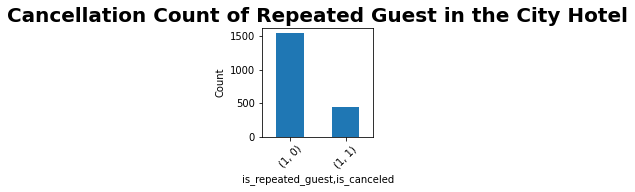

In [ ]:
plt.rcParams["figure.figsize"] = (2,2)
plt.title('Cancellation Count of Repeated Guest in the City Hotel',fontsize=20, fontweight = 'bold')
df_city_hotel.loc[df['is_repeated_guest']== 1].groupby('is_repeated_guest')['is_canceled'].value_counts().plot(kind='bar',ylabel='Count')
plt.xticks(rotation=45)

In [ ]:
get_percentage(df_resort_hotel.loc[df['is_repeated_guest']== 1].groupby('is_repeated_guest')['is_canceled'].value_counts())

is_repeated_guest  is_canceled
1                  0              1667
                   1               111
Name: is_canceled, dtype: int64


[93.7570303712036, 6.2429696287964]

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

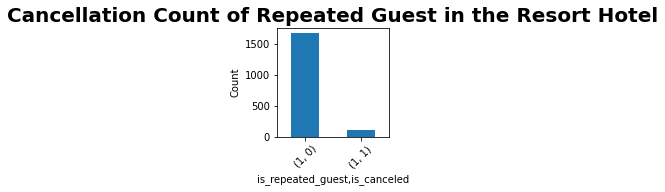

In [ ]:
plt.rcParams["figure.figsize"] = (2,2)
plt.title('Cancellation Count of Repeated Guest in the Resort Hotel',fontsize=20, fontweight = 'bold')
df_resort_hotel.loc[df['is_repeated_guest']== 1].groupby('is_repeated_guest')['is_canceled'].value_counts().plot(kind='bar',ylabel='Count')
plt.xticks(rotation=45)

Text(0.5, 0, 'Repeated Guest')

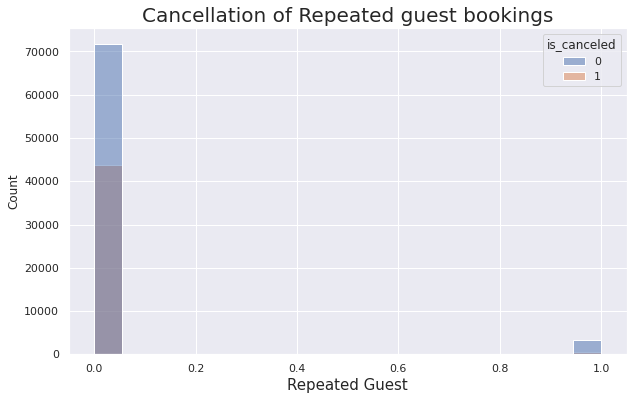

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='is_repeated_guest',data=df,hue='is_canceled')
plt.title("Cancellation of Repeated guest bookings",fontsize=20)
plt.xlabel("Repeated Guest",fontsize=15)

**Repeated Guest is less likely(6.2%) to cancel the booking and in resort hotel booking cancellation is very less likely. while city hotel has cancellation rate of 22.2%.**

In [ ]:
# plt.title('Cancellation Count of Repeated Guest in the Hotels')
# plt.subplots_adjust(left=0.2,
#                     bottom=0.3, 
#                     right=0.9, 
#                     top=1.5, 
#                     wspace=0.4, 
#                     hspace=1.8)
# plt.rcParams["figure.figsize"] = (10,2)
# plt.subplot(1,3,1)
# #plt.rcParams["figure.figsize"] = (2,2)
# plt.title('Hotels')
# df.loc[df['is_repeated_guest']== 1].groupby('is_repeated_guest')['is_canceled'].value_counts().plot(kind='bar',ylabel='Count',label='City HOtel')
# plt.xticks(rotation=45)
# plt.subplot(1,3,2)
# #plt.rcParams["figure.figsize"] = (3,3)
# plt.title('City Hotel')
# df_city_hotel.loc[df['is_repeated_guest']== 1].groupby('is_repeated_guest')['is_canceled'].value_counts().plot(kind='bar',ylabel='Count')
# plt.xticks(rotation=45)
# plt.subplot(1,3,3)
# #plt.rcParams["figure.figsize"] = (3,3)
# plt.title('Resort Hotel')
# df_resort_hotel.loc[df['is_repeated_guest']== 1].groupby('is_repeated_guest')['is_canceled'].value_counts().plot(kind='bar',ylabel='Count')
# plt.xticks(rotation=45)

#**8) Which deposit type is more likey to get cancelled and which type is less likely to get cancelled?**

In [ ]:
for cat in df.deposit_type.unique():
  print('\n',cat.upper(),'\n')
  print(get_percentage(df[df['deposit_type']==cat].groupby('deposit_type')['is_canceled'].value_counts()))



 NO DEPOSIT 

deposit_type  is_canceled
No Deposit    0              74792
              1              29669
Name: is_canceled, dtype: int64
[71.59801265544078, 28.401987344559217]

 REFUNDABLE 

deposit_type  is_canceled
Refundable    0              126
              1               36
Name: is_canceled, dtype: int64
[77.77777777777779, 22.22222222222222]

 NON REFUND 

deposit_type  is_canceled
Non Refund    1              14494
              0                 93
Name: is_canceled, dtype: int64
[99.36244601357373, 0.63755398642627]


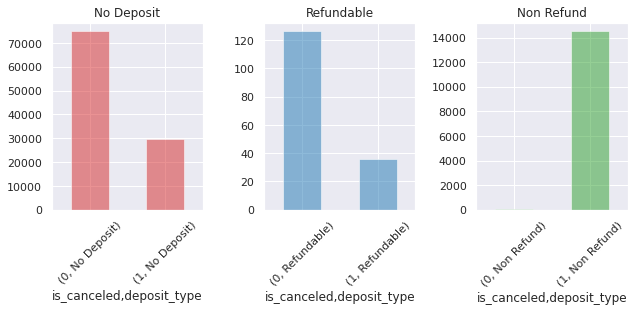

In [ ]:

plt.rcParams["figure.figsize"] = (10,2)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.deposit_type.unique()):
  plt.subplot(1,3,i+1)
  plt.title(cat)
  df.loc[df.deposit_type==cat].groupby('is_canceled')['deposit_type'].value_counts().plot(kind='bar',color=colors[i%5],alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

Text(0.5, 0, 'Deposit Type')

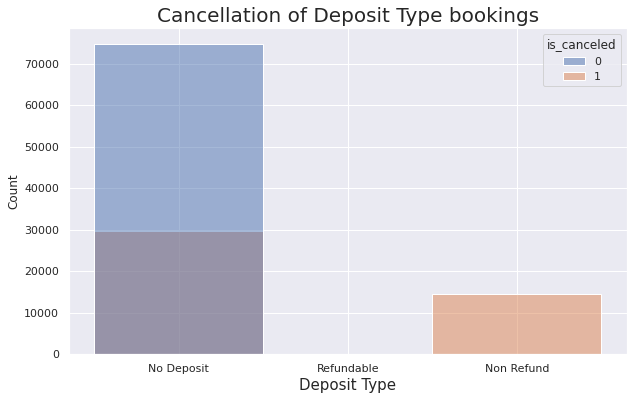

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='deposit_type',data=df,hue='is_canceled')
plt.title("Cancellation of Deposit Type bookings",fontsize=20)
plt.xlabel("Deposit Type",fontsize=15)

In [ ]:
# for i,cat in enumerate(df.deposit_type.unique()):
#   plt.subplot(1,3,i+1)
#   df[df['deposit_type']==cat].groupby('deposit_type')['is_canceled'].value_counts().plot(kind='bar',color=colors[i])



**Non refundable deposits(0.6%) are less likey to get cancelled, whereas no deposit(28.4%) and refundable(22.2%) ones are more likely to get cancelled.**

#**Repeated Guest Rate for different types of hotels?**

In [ ]:
plt.rcParams["figure.figsize"] = (3,3)


 CITY HOTEL REPEATED GUESTS PERCENTAGES


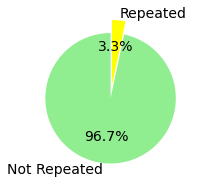

In [ ]:
# Convert value counts to list
sizes = df_not_canceled.loc[df_not_canceled['hotel']=='City Hotel'].groupby('hotel')['is_repeated_guest'].value_counts().tolist()

explode = (0, 0.2)

# Determine colour of pie chart
colors = ['lightgreen','yellow']

plt.pie(sizes, explode=explode, labels=['Not Repeated','Repeated'], colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
print('\n City Hotel Repeated guests Percentages'.upper())


 RESORT HOTEL REPEATED GUESTS PERCENTAGES


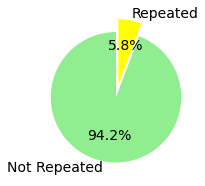

In [ ]:
# Convert value counts to list
sizes = df_not_canceled.loc[df_not_canceled['hotel']=='Resort Hotel'].groupby('hotel')['is_repeated_guest'].value_counts().tolist()

explode = (0, 0.2)

# Determine colour of pie chart
colors = ['lightgreen','yellow']

plt.pie(sizes, explode=explode, labels=['Not Repeated','Repeated'], colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
print('\n Resort Hotel Repeated guests Percentages'.upper())

3.3% for City hotels and 5.8% for Resort Hotels.

#**9) Which type of customers are most likely to cancel the booking?**

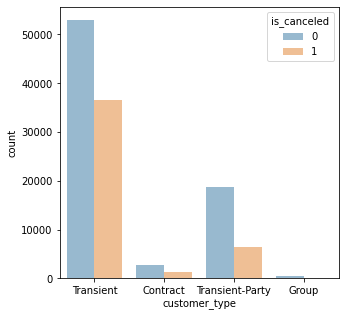

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
sns.countplot(data=df,x='customer_type',hue='is_canceled',alpha=0.5)

In [ ]:
for type in df.customer_type.unique():
  print('\n',type,'\n')
  print(get_percentage(df.loc[df.customer_type==type].groupby('customer_type')['is_canceled'].value_counts()))


 Transient 

customer_type  is_canceled
Transient      0              52982
               1              36494
Name: is_canceled, dtype: int64
[59.21364388215834, 40.786356117841656]

 Contract 

customer_type  is_canceled
Contract       0              2810
               1              1262
Name: is_canceled, dtype: int64
[69.00785854616896, 30.99214145383104]

 Transient-Party 

customer_type    is_canceled
Transient-Party  0              18703
                 1               6385
Name: is_canceled, dtype: int64
[74.54958545918367, 25.450414540816325]

 Group 

customer_type  is_canceled
Group          0              516
               1               58
Name: is_canceled, dtype: int64
[89.89547038327527, 10.104529616724738]


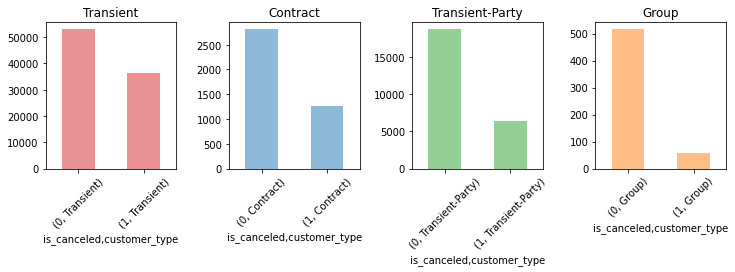

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.customer_type.unique()):
  plt.subplot(4,5,i+1)
  plt.title(cat)
  df.loc[df.customer_type==cat].groupby('is_canceled')['customer_type'].value_counts().plot(kind='bar',color=colors[i%5],alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

Text(0.5, 0, 'Customer Type')

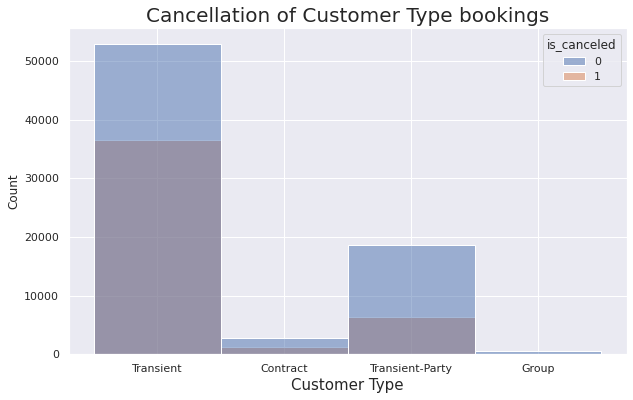

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='customer_type',data=df,hue='is_canceled')
plt.title("Cancellation of Customer Type bookings",fontsize=20)
plt.xlabel("Customer Type",fontsize=15)

**Transient and contract customers are most likely to cancel the booking.**

#**10) Preference hotels of different customers**

In [ ]:
for type in df.customer_type.unique():
  print('\n',type,'\n')
  print(get_percentage(df.loc[df.customer_type==type].groupby('customer_type')['hotel'].value_counts()))


 Transient 

customer_type  hotel       
Transient      City Hotel      59272
               Resort Hotel    30204
Name: hotel, dtype: int64
[66.24346193392641, 33.75653806607358]

 Contract 

customer_type  hotel       
Contract       City Hotel      2296
               Resort Hotel    1776
Name: hotel, dtype: int64
[56.385068762278976, 43.614931237721024]

 Transient-Party 

customer_type    hotel       
Transient-Party  City Hotel      17304
                 Resort Hotel     7784
Name: hotel, dtype: int64
[68.97321428571429, 31.026785714285715]

 Group 

customer_type  hotel       
Group          City Hotel      291
               Resort Hotel    283
Name: hotel, dtype: int64
[50.696864111498265, 49.30313588850174]


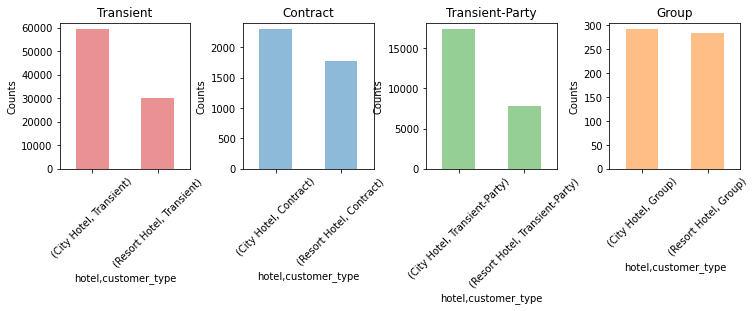

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.customer_type.unique()):
  plt.subplot(4,5,i+1)
  plt.title(cat)
  df.loc[df.customer_type==cat].groupby('hotel')['customer_type'].value_counts().plot(kind='bar',color=colors[i%5],ylabel='Counts',alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

#**11) Prefered bookings of different customers?**

In [ ]:
for type in df.customer_type.unique():
  print('\n',type,'\n')
  print(get_percentage(df.loc[df.customer_type==type].groupby('customer_type')['market_segment'].value_counts()))


 Transient 

customer_type  market_segment
Transient      Online TA         51236
               Offline TA/TO     14027
               Direct            11317
               Groups             8423
               Corporate          3569
               Complementary       688
               Aviation            216
Name: market_segment, dtype: int64
[57.26228262327327, 15.676829540882473, 12.648084402521345, 9.413697527828692, 3.9887791139523445, 0.7689212749787653, 0.24140551656310072]

 Contract 

customer_type  market_segment
Contract       Offline TA/TO     1816
               Online TA         1483
               Groups             735
               Corporate           22
               Direct              14
               Complementary        2
Name: market_segment, dtype: int64
[44.59724950884086, 36.419449901768175, 18.05009823182711, 0.5402750491159135, 0.343811394891945, 0.04911591355599214]

 Transient-Party 

customer_type    market_segment
Transient-Party  Groups        

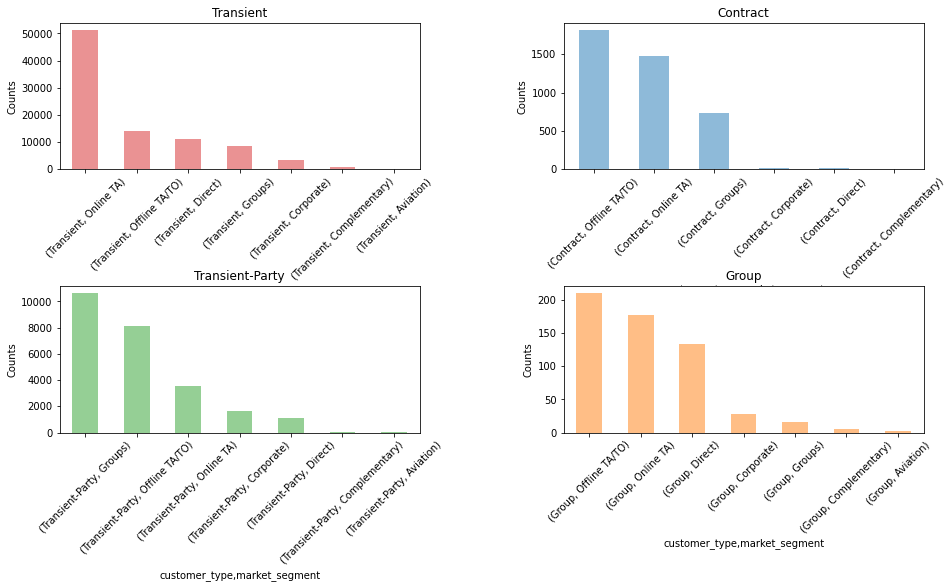

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.customer_type.unique()):
  plt.subplot(4,2,i+1)
  plt.title(cat)
  df.loc[df.customer_type==cat].groupby('customer_type')['market_segment'].value_counts().plot(kind='bar',color=colors[i%5],ylabel='Counts',alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

**Transient customers prefers Online TA while all others prefers Offline.**

#**12) Which type of customers are more repeated guests?**

In [ ]:
for type in df.customer_type.unique():
  print('\n',type.upper(),'\n')
  print(df.loc[df.customer_type==type].groupby('customer_type')['is_repeated_guest'].value_counts(normalize=True)*100)


 TRANSIENT 

customer_type  is_repeated_guest
Transient      0                    96.623676
               1                     3.376324
Name: is_repeated_guest, dtype: float64

 CONTRACT 

customer_type  is_repeated_guest
Contract       0                    99.238703
               1                     0.761297
Name: is_repeated_guest, dtype: float64

 TRANSIENT-PARTY 

customer_type    is_repeated_guest
Transient-Party  0                    97.839605
                 1                     2.160395
Name: is_repeated_guest, dtype: float64

 GROUP 

customer_type  is_repeated_guest
Group          0                    71.95122
               1                    28.04878
Name: is_repeated_guest, dtype: float64


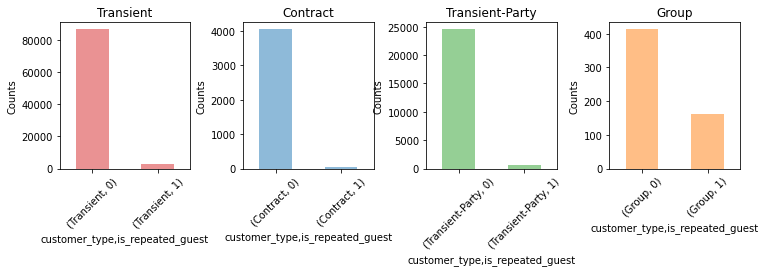

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.customer_type.unique()):
  plt.subplot(4,5,i+1)
  plt.title(cat)
  df.loc[df.customer_type==cat].groupby('customer_type')['is_repeated_guest'].value_counts().plot(kind='bar',color=colors[i%5],ylabel='Counts',alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

**Group Customers(28%) are more repeated guests and contract(0.76%) are less repeated.**

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'lead_time_bin'],
      dtype='object')

In [ ]:
for type in df.customer_type.unique():
  print('\n',type.upper(),'\n')
  print(get_percentage(df.loc[df.customer_type==type].groupby('customer_type')['meal'].value_counts()))


 TRANSIENT 

customer_type  meal     
Transient      BB           70632
               SC            9892
               HB            8019
               FB             547
               Undefined      386
Name: meal, dtype: int64
[78.93960391613393, 11.055478564084224, 8.962179802405114, 0.6113371183334079, 0.43140059904331884]

 CONTRACT 

customer_type  meal     
Contract       BB           3256
               HB            613
               SC            183
               Undefined      15
               FB              5
Name: meal, dtype: int64
[79.96070726915521, 15.054027504911591, 4.494106090373281, 0.36836935166994106, 0.12278978388998035]

 TRANSIENT-PARTY 

customer_type    meal     
Transient-Party  BB           17849
                 HB            5790
                 Undefined      766
                 SC             438
                 FB             245
Name: meal, dtype: int64
[71.14556760204081, 23.07876275510204, 3.053252551020408, 1.7458545918367347, 0.97656

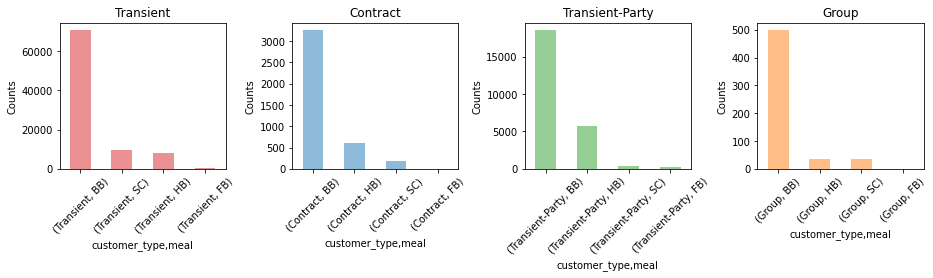

In [ ]:
#Most Ordered Meal  W.R.T Customers
plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.customer_type.unique()):
  plt.subplot(4,4,i+1)
  plt.title(cat)
  df.loc[df.customer_type==cat].groupby('customer_type')['meal'].value_counts().plot(kind='bar',color=colors[i%5],ylabel='Counts',alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

Text(0.5, 0, 'Customer Type')

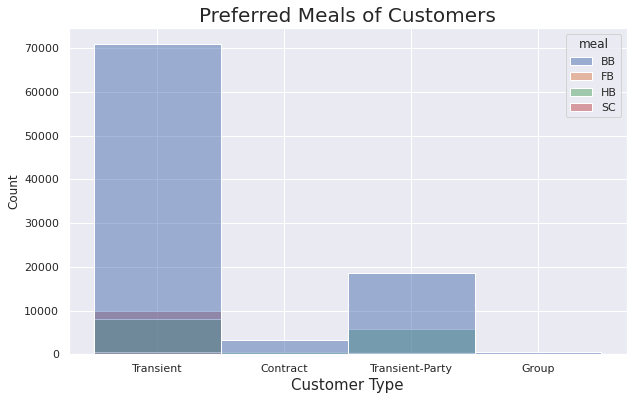

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='customer_type',data=df,hue='meal')
plt.title("Preferred Meals of Customers",fontsize=20)
plt.xlabel("Customer Type",fontsize=15)

In [ ]:
for type in df.customer_type.unique():
  print('\n',type.upper(),'\n')
  print(get_percentage(df.loc[df.customer_type==type].groupby('customer_type')['stays_in_week_nights'].value_counts().head()))


 TRANSIENT 

customer_type  stays_in_week_nights
Transient      2                       24323
               1                       22247
               3                       17109
               5                        8456
               4                        7651
Name: stays_in_week_nights, dtype: int64
[30.485298172611735, 27.883337928959968, 21.443611661193692, 10.598350587822425, 9.589401649412178]

 CONTRACT 

customer_type  stays_in_week_nights
Contract       2                       914
               5                       905
               1                       745
               3                       461
               10                      323
Name: stays_in_week_nights, dtype: int64
[27.299880525686977, 27.0310633213859, 22.252090800477898, 13.76941457586619, 9.647550776583035]

 TRANSIENT-PARTY 

customer_type    stays_in_week_nights
Transient-Party  2                       8344
                 1                       7081
                 3              

#**13) Which type of customers are more likely to put a special request?**

In [ ]:
for type in df.customer_type.unique():
  print('\n',type.upper(),'\n')
  print(get_percentage(df.loc[df.customer_type==type].groupby('customer_type')['total_of_special_requests'].value_counts()))


 TRANSIENT 

customer_type  total_of_special_requests
Transient      0                            49246
               1                            26743
               2                            11037
               3                             2121
               4                              300
               5                               29
Name: total_of_special_requests, dtype: int64
[55.0382225401225, 29.88846171040279, 12.335151325495104, 2.3704680584737807, 0.3352854396709732, 0.03241092583486074]

 CONTRACT 

customer_type  total_of_special_requests
Contract       0                            2104
               1                            1121
               2                             709
               3                             128
               4                               6
               5                               4
Name: total_of_special_requests, dtype: int64
[51.66994106090373, 27.529469548133594, 17.411591355599214, 3.143418467583497, 0.14734

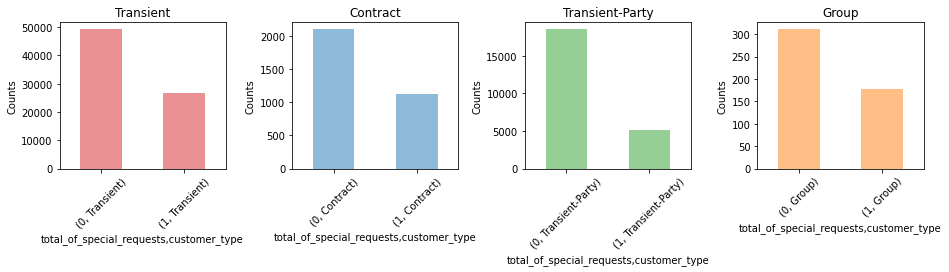

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.customer_type.unique()):
  plt.subplot(4,4,i+1)
  plt.title(cat)
  df.loc[df.customer_type==cat].groupby('total_of_special_requests')['customer_type'].value_counts().head(2).plot(kind='bar',color=colors[i%5],ylabel='Counts',alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

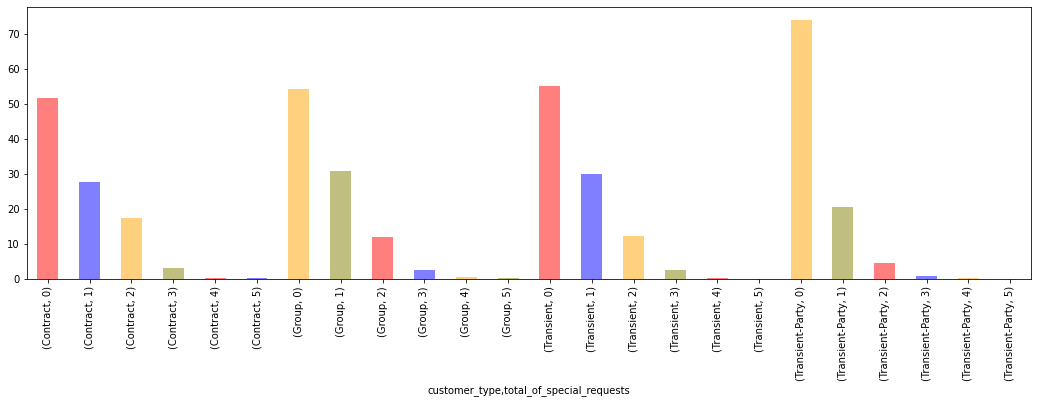

In [ ]:
(df.groupby('customer_type')['total_of_special_requests'].value_counts(normalize=True)*100).plot(kind='bar',color=['red','blue','orange','olive'],alpha=0.5)

**Group and transient customers are more likely puts a special request.**

In [ ]:
for type in df.customer_type.unique():
  print('\n',type.upper(),'\n')
  print(get_percentage(df.loc[df.customer_type==type].groupby('customer_type')['required_car_parking_spaces'].value_counts()))


 TRANSIENT 

customer_type  required_car_parking_spaces
Transient      0                              83063
               1                               6395
               2                                 16
               3                                  2
Name: required_car_parking_spaces, dtype: int64
[92.83271491796683, 7.147167955652913, 0.017881890115785237, 0.0022352362644731546]

 CONTRACT 

customer_type  required_car_parking_spaces
Contract       0                              3938
               1                               133
               2                                 1
Name: required_car_parking_spaces, dtype: int64
[96.70923379174853, 3.266208251473477, 0.02455795677799607]

 TRANSIENT-PARTY 

customer_type    required_car_parking_spaces
Transient-Party  0                              24277
                 1                                797
                 2                                 11
                 8                                  2
     

**Transient and group people requires more parking spaces**

#**14) Bookings of diffrent customers across months?**

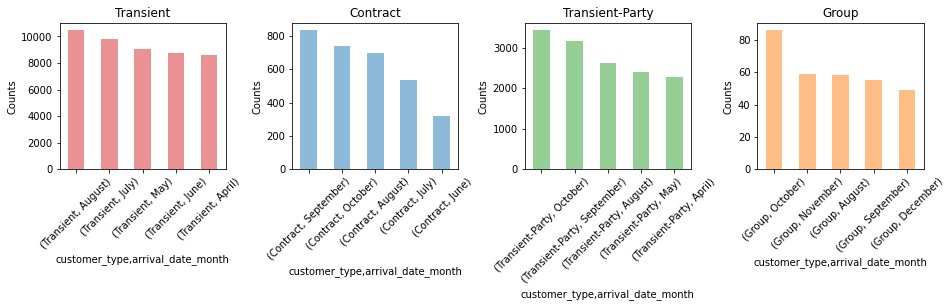

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive']
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.8)

for i,cat in enumerate(df.customer_type.unique()):
  plt.subplot(4,4,i+1)
  plt.title(cat)
  df.loc[df.customer_type==cat].groupby('customer_type')['arrival_date_month'].value_counts().head().plot(kind='bar',color=colors[i%5],ylabel='Counts',alpha=0.5)
  plt.xticks(rotation=45)
  #plt.ylim(0, 100) 
  #plt.xlim(0, 1)

**Contract customer usually books in sept and oct, group in oct and nov,transient in aug and july, transient_party in oct and sept.** 

In [ ]:
sns.boxplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



ValueError: ignored

In [ ]:
for type in df.customer_type.unique():
  print('\n',type.upper(),'\n')
  print(get_percentage(df.loc[df.customer_type==type].groupby('customer_type')['arrival_date_month'].value_counts().head()))


 TRANSIENT 

customer_type  arrival_date_month
Transient      August                10483
               July                   9815
               May                    9067
               June                   8760
               April                  8608
Name: arrival_date_month, dtype: int64
[22.4316863886333, 21.002289602636253, 19.401707572807226, 18.744784199601995, 18.419532236321228]

 CONTRACT 

customer_type  arrival_date_month
Contract       September             835
               October               737
               August                696
               July                  537
               June                  319
Name: arrival_date_month, dtype: int64
[26.728553137003843, 23.591549295774648, 22.279129321382843, 17.189500640204866, 10.211267605633804]

 TRANSIENT-PARTY 

customer_type    arrival_date_month
Transient-Party  October               3436
                 September             3166
                 August                2624
                 Ma

#**Waiting List over the year**

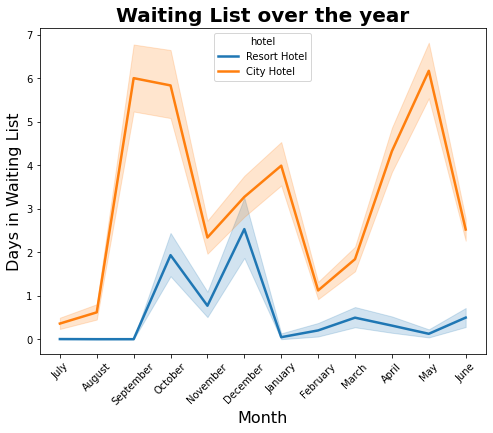

In [ ]:

plt.figure(figsize=(8, 6))

sns.lineplot(x = "arrival_date_month", y="days_in_waiting_list", hue="hotel", data=df, size="hotel", sizes=(2.5, 2.5))
plt.title("Waiting List over the year", fontsize=20, fontweight = 'bold')
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Days in Waiting List", fontsize=16)
plt.show()

#Summary

**Dataset Analysis**

1)City Hotel has more number of bookings, it has 66%  bookings while resort hotel has 34%.

2) 37% of the bookings were cancelled.

3)There is 29% growth in the bookings in 2016(47%) that is more than a double comapared to previous year(2015 -> 18%) but the bookings decreased by 13% next year(2017 -> 34%).

4)Most bookings were made in August and July and least bookings were made at start and end of the year.

5)Customers usually booked for 1 or 2 weekend nights if stayed at the hotel in the weekends.

6) Customers usually booked for 1,2 or 3 week nights.

7)BB is the most common meal package.

8)Most guests comes from Europe. Portugal, UK, France, Spain and Germany are the top countries from most guests come, more than 70% come from these 5 countries. 

9) Most of the bookings were made online.

10) Repeated Guest rate if 3%.

11)Most of the hotels are not keeping deposit mandatory.

12)Most of the bookings were of transient type.






**1) Which type of Hotel is more likely to cancel?**

A)City Hotels has the cancelation percentage of 41.7% and resort hotels has 28% i.e city hotels are more likely to get cancelled and resort hotels are less likely to get cancelled, while the overall cancelation percentage is 37%.

**2) How far in advance customers book hotels?**

A)Most of the customers book hotels 1 or 2 months prior to the arrival.

**3) Most popular meal package across hotels?**

A)BB is the most popular meal in city hotels while BB and HB are popular in resort hotels.

**4) Which type of market_segment bookings are most likely to get cancelled?**

A)Bookings through groups(61%) and online TA(36.7%) market_segment are more likely to get cancelled.

**5) Bookings from market_segment across years**

A)Online Bookings are increasing over the years (28.03% in 2015 to 48.79% in 2016 to 55.68% in 2017).

**6) Bookings from which distribution channel are more sucessful and which has more cancellation percentage?**

A)Bookings from direct distribution channel are highly sucessfull and TA/TO has highest cancellation percentage.

**7) How likely repeated guest is going to cancel booking?**

A)Repeated Guest is less likely(6.2%) to cancel the booking and in resort hotel booking cancellation is very less likely. while city hotel has cancellation rate of 22.2%.


**8) Which deposit type is more likey to get cancelled and which type is less likely to get cancelled?**

A)Non refundable deposits(0.6%) are less likey to get cancelled, whereas no deposit(28.4%) and refundable(22.2%) ones are more likely to get cancelled.


**9) Which type of customers are most likely to cancel the booking?**

A)Transient and contract customers are most likely to cancel the booking.

**10)Preference hotels of different customers**

**11) Prefered bookings of different customers?**

A)Transient customers prefers Online TA while all others prefers Offline.

**12) Which type of customers are more repeated guests?**

A) Group Customers(28%) are more repeated guests and contract(0.76%) are less repeated.

**13) Which type of customers are more likely to put a special request?**

A)Group and transient customers are more likely puts a special request.

**14) Bookings of diffrent customers across months?**

A)Contract customer usually books in sept and oct, group in oct and nov,transient in aug and july, transient_party in oct and sept.


In [ ]:
country_visitors = df.groupby(['country']).size().reset_index(name = 'count')

import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

#Heat Map

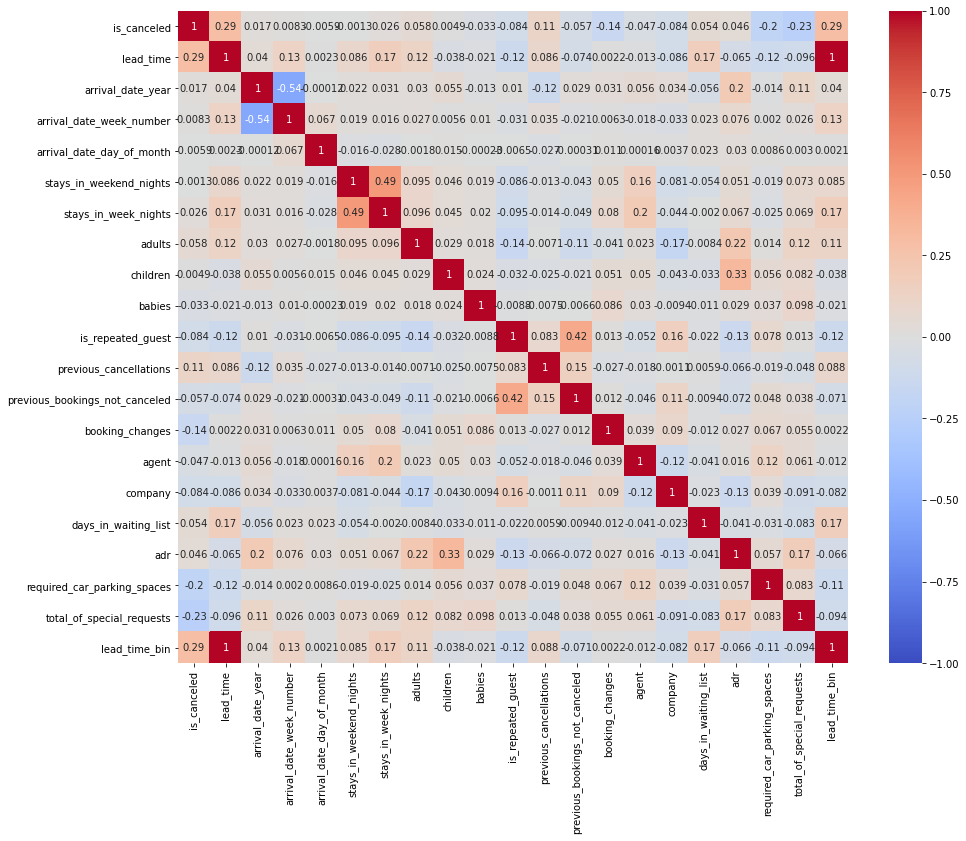

In [ ]:
plt.rcParams["figure.figsize"] = (15,12)
sns.heatmap(df.corr(),vmin=-1, cmap='coolwarm', annot=True)

In [ ]:
df_corr = df[[]]

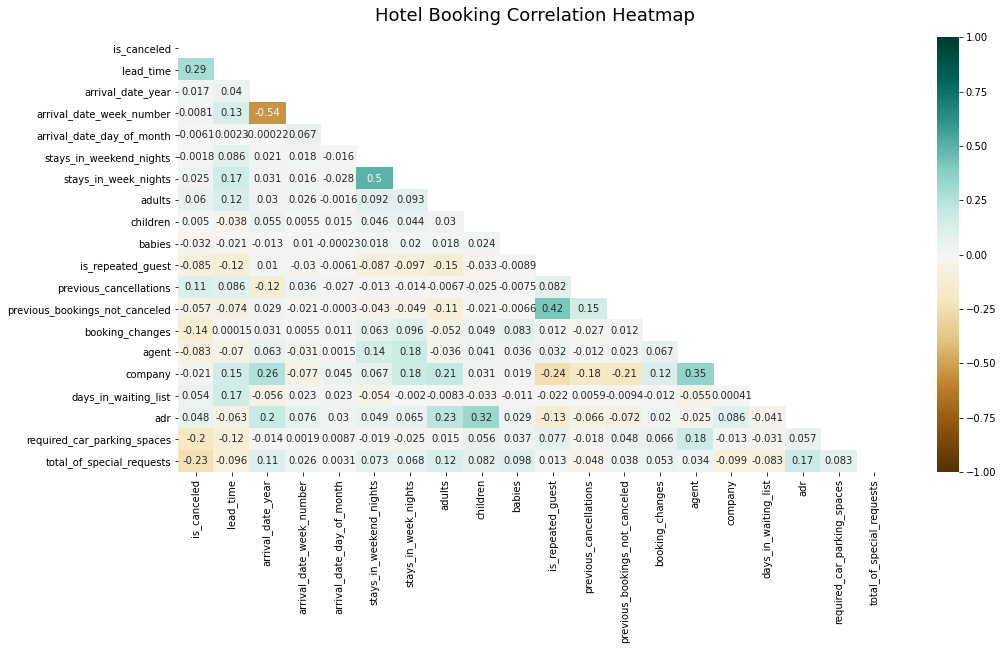

In [ ]:
plt.figure(figsize=(16, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Hotel Booking Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
df[['is_canceled','lead_time','stays_in_weekend_nights','stays_in_week_nights','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                    'booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]

In [ ]:
correlated_features = set()
correlation_matrix = df.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
print(correlated_features)

{'lead_time_bin'}


As lead_time_bin is derived from lead_time we can say that all features are **independent** from each other.